# Задание 1

In [1]:
import numpy as np 
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import sys

In [2]:
#Поиск седловых точек матрицы
def saddle_point(A) -> tuple:
    m = A.shape[0]
    n = A.shape[1]

    min_rows = np.min(A, axis = 1)
    max_cols = np.max(A, axis = 0)

    maxmin = np.max(min_rows)
    minmax = np.min(max_cols)

    rows_idx = None
    cols_idx = None
    if (maxmin == minmax):
        rows_idx = np.argmax(min_rows)
        cols_idx = np.argmin(max_cols)

    return (rows_idx, cols_idx)


In [3]:
#Поиск оптимальных стратегий
def nash_equilibrilium(A):
    #Проверяем, есть ли седловые точки
    prob_saddle_point = saddle_point(A)

    #Если есть, то все ок, дальше ничего не считаем
    if (prob_saddle_point != (None, None)):
        p = np.zeros(A.shape[0])
        q = np.zeros(A.shape[1])
        p[prob_saddle_point[0]] = 1
        q[prob_saddle_point[1]] = 1
        game_value = A[prob_saddle_point[0]][prob_saddle_point[1]]
        return p, q, game_value, "pure"

    #Если седловых точек нет и все не ок, разбиваем на две задачи линейного программирования и решаем симлекс-методом.
    #Спасибо scipy за существование linprog

    m = A.shape[0]
    n = A.shape[1]
    min_a = A.min()
    dobavochka = 0
    if (min_a < 0):
        dobavochka = 1 + abs(min_a)
    A = A + dobavochka
    z_1 = np.ones(m)
    z_2 = np.ones(n) * (-1)
    b_1 = np.ones(n) * (-1)
    b_2 = np.ones(m)
    A_1 = A.transpose() * (-1)
    A_2 = A

    player_1 = linprog(c = z_1, A_ub = A_1, b_ub = b_1, bounds = (0, float("inf")), method = "simplex")
    player_2 = linprog(c = z_2, A_ub = A_2, b_ub = b_2, bounds = (0, float("inf")), method = "simplex")

    game_value = 1 / player_1.fun
    p = player_1.x * game_value
    q = player_2.x * game_value
    return p, q, game_value - dobavochka, "mixed"

In [4]:
#Печать матрицы с округлением ее элементов до 3 знака после запятой
def print_matrix(A):
    m = A.shape[0]
    n = A.shape[1]
    for i in range(m):
        for j in range (n):
            print ("%.3f" % (a[i][j]), end = '  ')
        print()

In [5]:
#Печать вектора с округлением его элементов до 3 знака после запятой
def print_vector(v):
    n = v.shape[0]
    print ('[', end = ' ')
    for i in range(n):
        print ("%.3f" % (v[i]), end = '  ')
    print (']')


In [6]:
#Визуализация вектора оптимальной стратегии
def visualization(v):
    n = len(v)
    x = np.linspace(1, n, n)  
    plt.axis([0, n + 1, 0, max(v) + 1]) 
    plt.style.use('ggplot')
    plt.stem(x, v, basefmt=' ')
    plt.show()


In [7]:
#Чтение матрицы из файла
def input_from_file(filename):
    return np.loadtxt(filename, delimiter=' ')


In [8]:
#Печать оптимальных стратегий
def print_results(p, q, game_value, strategy_type):
    print("Solution in " + strategy_type + " strategies.")
    print("Game value is: ", "%.3f" % (game_value))
    print("First player's optimal strategy")
    print_vector(p)
    print("Second player's optimal strategy")
    print_vector(q)

In [9]:
#Решение матричной игры и визуализация результата
def main(file_name):
    try:
        A = input_from_file(file_name)
    except Exception:
        print("Incorrect file")
        sys.exit()
    p, q, game_value, strategy_type = nash_equilibrilium(A)
    print_results(p, q, game_value, strategy_type)
    visualization(p)
    visualization(q)

##  Иллюстрация работы кода путем решения нескольких игр.

### Пример 1:

#### Спектр оптимальной стратегии состоит из одной точки. Существует равновесие Нэша в чистых стратегиях.   

Solution in pure strategies.
Game value is:  6.000
First player's optimal strategy
[ 0.000  0.000  1.000  0.000  ]
Second player's optimal strategy
[ 0.000  1.000  0.000  0.000  ]


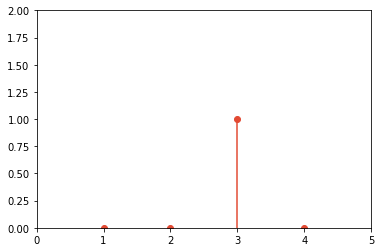

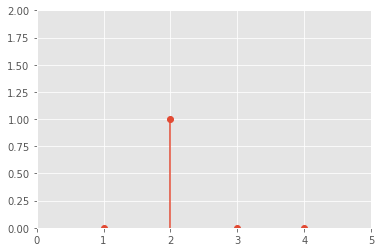

In [10]:
A = np.array([[4, 5, 9, 3], [8, 4, 3, 7], [7, 6, 8, 9], [7, 2, 4, 6]])
np.savetxt('input1.txt', A)
main('input1.txt')

Solution in pure strategies.
Game value is:  6.000
First player's optimal strategy
[ 0.000  0.000  1.000  0.000  ]
Second player's optimal strategy
[ 0.000  1.000  0.000  0.000  0.000  ]


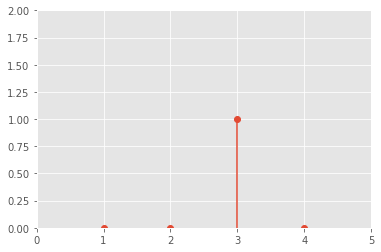

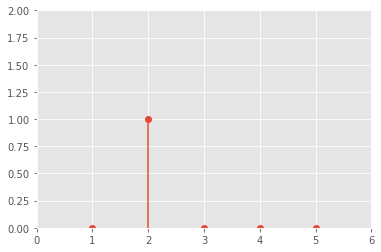

In [11]:
A = np.array([[4, 5, 6, 7, 9], [3, 4, 6, 7, 6], [7, 6, 10, 8, 11], [8, 5, 4, 7, 3]])
np.savetxt('input2.txt', A)
main('input2.txt')

### Пример 2:

#### Спектр оптимальной стратегии не полон. 

Solution in mixed strategies.
Game value is:  2.200
First player's optimal strategy
[ 0.000  0.400  0.600  ]
Second player's optimal strategy
[ 0.400  0.000  0.600  ]


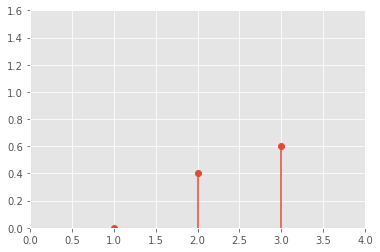

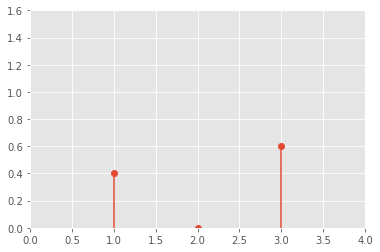

In [12]:
A = np.array([[2, 3, 2], [4, 2, 1], [1, 3, 3]])
np.savetxt('input3.txt', A)
main('input3.txt')

Solution in mixed strategies.
Game value is:  6.486
First player's optimal strategy
[ 0.686  0.057  0.000  0.257  ]
Second player's optimal strategy
[ 0.057  0.229  0.714  ]


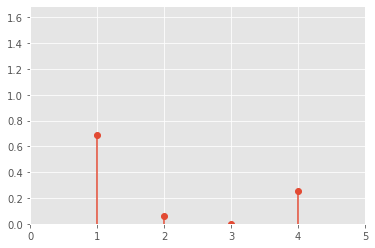

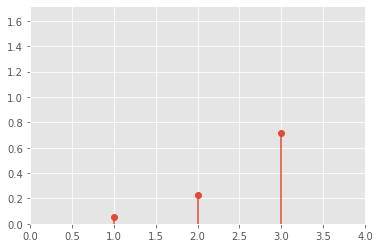

In [13]:
A = np.array([[6, 5, 7], [10, 4, 7], [13, 10, 4], [7, 11, 5]])
np.savetxt('input4.txt', A)
main('input4.txt')

### Пример 3:

#### Спектр оптимальной стратегии полон 

Solution in mixed strategies.
Game value is:  2.514
First player's optimal strategy
[ 0.543  0.171  0.286  ]
Second player's optimal strategy
[ 0.257  0.400  0.343  ]


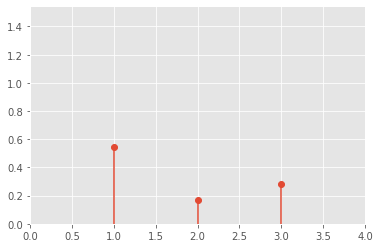

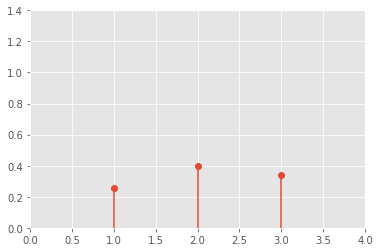

In [14]:
A = np.array([[4, 2, 2], [2, 5, 0], [0, 2, 5]])
np.savetxt('input5.txt', A)
main('input5.txt')

Solution in mixed strategies.
Game value is:  321.053
First player's optimal strategy
[ 0.421  0.579  ]
Second player's optimal strategy
[ 0.526  0.474  ]


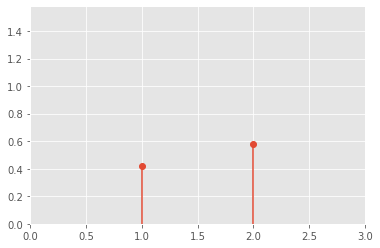

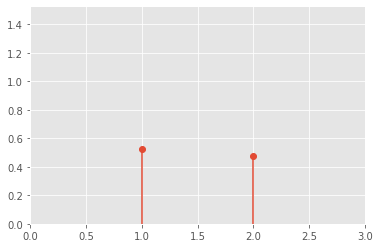

In [15]:
A = np.array([[-200, 900], [700, -100]])
np.savetxt('input6.txt', A)
main('input6.txt')

Solution in mixed strategies.
Game value is:  0.000
First player's optimal strategy
[ 0.333  0.333  0.333  ]
Second player's optimal strategy
[ 0.333  0.333  0.333  ]


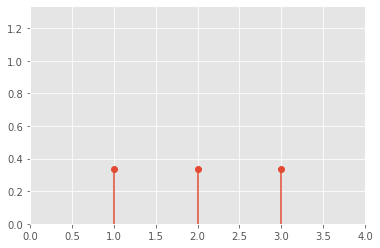

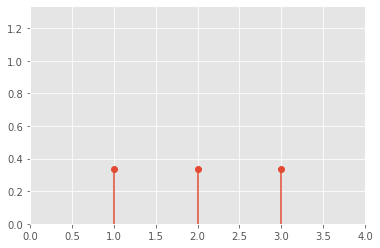

In [16]:
A = np.array([[0, 2, -2], [-2, 0, 2], [2, -2, 0]])
np.savetxt('input7.txt', A)
main('input7.txt')

Solution in mixed strategies.
Game value is:  -0.333
First player's optimal strategy
[ 0.000  0.611  0.389  ]
Second player's optimal strategy
[ 0.000  0.333  0.000  0.000  0.667  ]


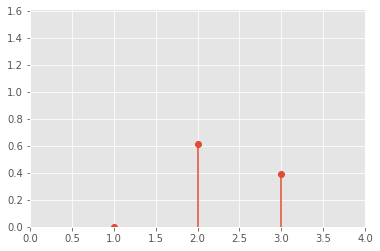

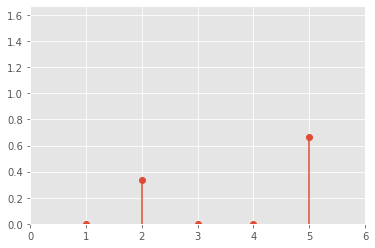

In [17]:
A = np.array([[5, -8, 7, -6, 0], [8, -5, 9, -3, 2], [-2, 7, -3, 6, -4]])
np.savetxt('input8.txt', A)
main('input8.txt')